In [5]:
import sys, glob
from numpy import concatenate
#sys.path.insert(0,'/Users/tizi/Documents/YALE_WL.nosync/purity-monitor/Jupyter/runner')
sys.path.insert(0,'/home/tb829/project/purity-monitor/Jupyter/Log/')
from runner import Runner

In [6]:
#files = glob.glob(r'/Users/tizi/Documents/YALE_WL.nosync/data/20220812/SRS_Gain_100/4Vpp_3min_0.2V_intervals/**/*')
#files2 = glob.glob(r'/Users/tizi/Documents/YALE_WL.nosync/data/20220814/4Vpp_3min_0.2V_intervals/**/*')

#files = glob.glob(r'/gpfs/gibbs/project/david_moore/ab2935/Data/20220812/SRS_Gain_100/4Vpp_3min_0.2V_intervals/7.0kHz/*')
files3 = glob.glob(r'/gpfs/gibbs/project/david_moore/ab2935/Data/20220812/SRS_Gain_100/4Vpp_3min_0.2V_intervals/**/*')

#files3 = concatenate((files,files2))
print(len(files3))
#files3 = '/Users/tizi/Documents/YALE_WL.nosync/data/20220812/SRS_Gain_100/4Vpp_3min_0.2V_intervals/10.0kHz/mca_keith_30.00OV_0.h5'

210


34.0  @  7.0  -> creating new


IntProgress(value=0, bar_style='info', description='7.00@34.0V', layout=Layout(width='100%'), max=184)

division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero
division by zero


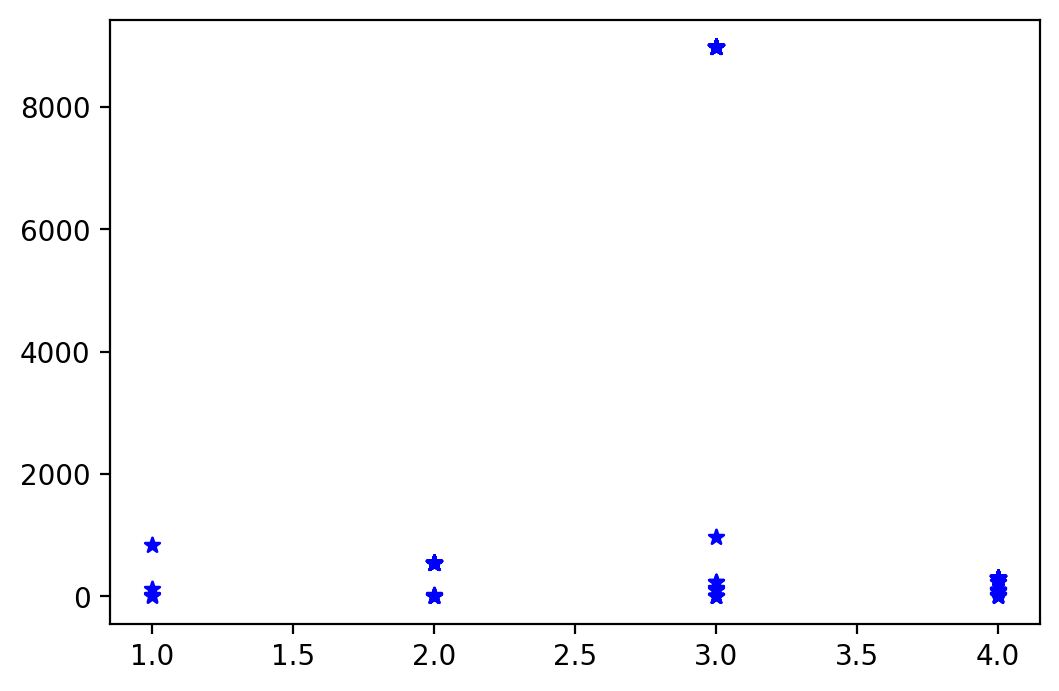

Selected (3, 98) for 8980.497025658458 best quality! (sigma: 0.0003340572344079182


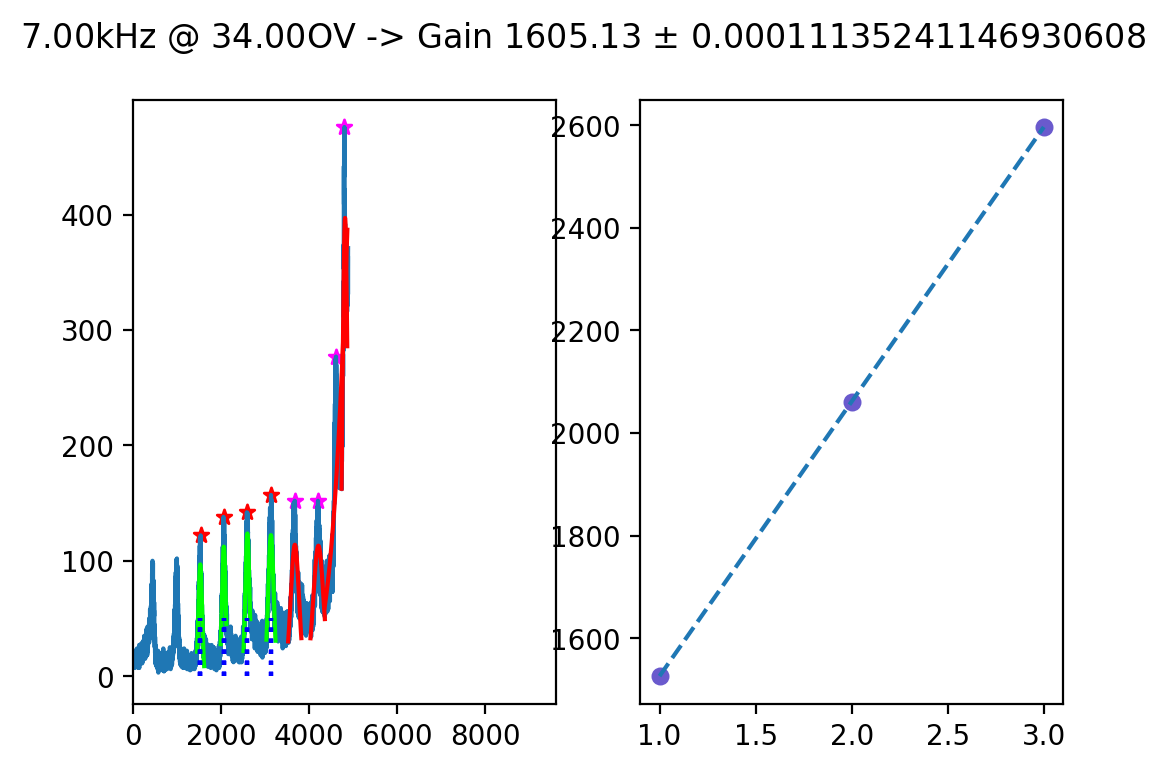

In [7]:
files3 = glob.glob(r'/gpfs/gibbs/project/david_moore/ab2935/Data/20220812/SRS_Gain_100/4Vpp_3min_0.2V_intervals/**/*')
Bolt = Runner()
Bolt.min_peaks = 3
Bolt.distance_factor = 250
Bolt.bin_start = 1
Bolt.bin_stop = 5
Bolt.bin_step = 1
#res = Bolt.forrest(files3, pool=True)
res = Bolt.magic(r'/gpfs/gibbs/project/david_moore/ab2935/Data/20220814/SRS_Gain_100/4Vpp_3min_0.2V_intervals/7.0kHz/mca_keith_34.00OV_0.h5',{},reload=True)
#print(Bolt)

In [ ]:
#print(Bolt.keys())
"""frequencies = {}

for key in Bolt.keys():
    voltage = float(str(key).split('@')[0])
    freq = float(str(key).split('@')[1])
    gain, error = Bolt[key]

    if not freq in list(frequencies.keys()): frequencies[freq] = ([],[],[])

    frequencies[freq][0].append(voltage)
    frequencies[freq][1].append(gain)
    frequencies[freq][2].append(error)"""

In [ ]:
"""for f in frequencies.keys():
    voltages = frequencies[f][0]
    gains = frequencies[f][1]
    errors = frequencies[f][2]
    plt.scatter(voltages,gains)
    plt.show()"""

In [ ]:
import glob, os
import matplotlib as mpl
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
mpl.rcParams['figure.dpi']= 200

#files = glob.glob(r'/Users/tizi/Documents/YALE_WL.nosync/purity-monitor/Jupyter/Log/data/*')
files = glob.glob('data/*')

frequencies = {}
fre_volts = {}

for f in files:
    if not 'backup' in f:
        filename = os.path.split(f)[1]
        voltage = float(filename.split('@')[0])
        frequency = float(filename.split('@')[1].split('.txt')[0])
        
        with open(f,'r') as opened:
            lines = opened.readlines()
            for line in lines:
                if len(line) == 0: continue
                key = line.split(':(')[0][1:-2]
                bins = int(key.split(',')[0])
                prominence = int(key.split(',')[1])
                value = line.split(':(')[1]
                #voltage = float(filename.split('@')[0])
                #frequency = float(filename.split('@')[1].split('.txt')[0])
                if frequency == 0.00:
                    print(filename)
                    print(line)
                gain = float(value.split(',')[0])/bins
                error = float(value.split(',')[1][:-2])
                if not frequency in list(fre_volts.keys()): fre_volts[frequency] = []
                if voltage in fre_volts[frequency]:
                    print(f'Voltage {voltage} for {frequency} already exists')
                fre_volts[frequency].append(voltage)
                if not frequency in list(frequencies.keys()): frequencies[frequency] = []
                frequencies[frequency].append((voltage, (gain,error,bins)))

                #plt.scatter([voltage],[gain],30,c='red',marker='*')
    #plt.clf()
                
frequencies_un = np.unique(list(frequencies.keys()))
print(frequencies_un)
print(frequencies)
#with open(f'{voltage}@{frequency}.txt','w') as f:

In [ ]:
colors = ['slateblue', 'green', 'brown', 'yellow', 'red', 'blue', 'navy','magenta','orange','purple']
def line(x,a,b): return a*(x-b)
plt.figure(facecolor='white',figsize=(15,20))
for ii, freq in enumerate(frequencies_un[1:]):
    values = frequencies[freq]
    color = colors[ii]
    voltages = []
    gains = []
    errors = []
    for value in values:
        voltage, data_val = value
        gain, error, bins = data_val
        #if freq == 10.0 and voltage < 31.8: continue
        #if freq == 7.0 and voltage < 31.0: continue
        #if freq == 5.0 and voltage < 30.4: continue
        #if voltage == 32.4: gain = 578*5
        if voltage in voltages:
            index = np.argwhere(np.asarray(voltages) == voltage)[0][0]
            old_err = errors[index]
            if gains[index] == gain: continue
            print(f'{voltage} already looped',end=' ')
            print(f'OLD GAIN {gains[index]} vs new {gain}')
            if error > old_err:
                print(f'{error} > {old_err} --> SKIPPED')
                continue
            else:
                gains[index] = gain
                errors[index] = error
                print(f'{error} < {old_err} --> REBASED')
                continue
        voltages.append(voltage)
        gains.append(gain)
        errors.append(error)
        print(f'{voltage}@{frequency} -> {gain} and {error}')
    if len(gains) == 0:
        print(freq,' : ',voltage)
        print(values)
    
    plt.errorbar([31.00],[418],yerr=[0.00001],fmt='o',ms=10,color=color)
    plt.errorbar(voltages,gains,yerr=errors,fmt='o',ms=10,color=color)
    popt,pcov = curve_fit(line,voltages,gains,sigma=errors,maxfev=1000000)
    plt.plot(voltages,line(voltages,*popt),color=color,label=str(freq)+'kHz')
    print(f'{freq:.02f}kHz ->  {popt[0]:.5f} ± {np.sqrt(np.abs(np.diag(pcov)))[1]:.5f}      ({color})')
    plt.xticks(np.unique(voltages))
    
plt.legend(loc='upper left')
plt.xlabel('[volts]')
#plt.savefig(r'/Users/Tizi/Desktop/plotter.png')
plt.show()